In [1]:
import numpy as np
import pandas as pd  # for data analytics

# The two packages below are for plotting
import seaborn as sns  #seaborn has nice features. Need to load pyplot with seaborn at the same time
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

In [4]:
df = pd.read_csv('national_accidents_attributes_adjusted.csv')

In [5]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option('display.max_colwidth', None)
pd.set_option("display.max_rows", None)
df.head()

,Severity,Start_Time,City,State,Weather_Timestamp,Temp_F,Humidity_percent,Pressure_in,Visibility_mi,Wind_Direction,Wind_Speed_mph,Precipitation_in,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Street,Cross_street,CLOUDY,RAIN,FOG,THUNDER,WINDY,SNOW,SLEET,DUST,TORNADO,HAIL,Non_workday,Work_day,Rush_hour,Severity_simple
0,3,2016-02-08 00:37:08,Dublin,OH,2016-02-08 00:53:00,42.1,58.0,29.76,10.0,SW,10.4,0.00,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,OUTERBELT E,SAWMILL RD,0,1,0,0,0,0,0,0,0,0,0,1,0,1
1,2,2016-02-08 05:56:20,Dayton,OH,2016-02-08 05:58:00,36.9,91.0,29.68,10.0,CALM,7.0,0.02,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,I-70 E,OH-4,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,2,2016-02-08 06:15:39,Cincinnati,OH,2016-02-08 05:53:00,36.0,97.0,29.70,10.0,CALM,7.0,0.02,False,False,False,False,True,False,False,False,False,False,False,False,False,Night,I-75 S,I-71,1,0,0,0,0,0,0,0,0,0,0,1,0,0
3,2,2016-02-08 06:51:45,Akron,OH,2016-02-08 06:54:00,39.0,55.0,29.65,10.0,CALM,7.0,0.00,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,I-77 N,DART AVE,1,0,0,0,0,0,0,0,0,0,0,1,0,0
4,3,2016-02-08 07:53:43,Cincinnati,OH,2016-02-08 07:53:00,37.0,93.0,29.69,10.0,WSW,10.4,0.01,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,I-75 S,MITCHELL AVE,0,1,0,0,0,0,0,0,0,0,0,1,1,1


In [6]:
df.describe()

,Severity,Temp_F,Humidity_percent,Pressure_in,Visibility_mi,Wind_Speed_mph,Precipitation_in,CLOUDY,RAIN,FOG,THUNDER,WINDY,SNOW,SLEET,DUST,TORNADO,HAIL,Non_workday,Work_day,Rush_hour,Severity_simple
count,1.184871e+06,1.184871e+06,1.184871e+06,1.184871e+06,1.184871e+06,1.184871e+06,1.184871e+06,1.184871e+06,1.184871e+06,1.184871e+06,1.184871e+06,1.184871e+06,1.184871e+06,1.184871e+06,1.184871e+06,1.184871e+06,1.184871e+06,1.184871e+06,1.184871e+06,1.184871e+06,1.184871e+06
mean,2.222448e+00,6.237918e+01,6.308089e+01,2.955843e+01,9.151159e+00,7.784320e+00,6.405431e-03,4.300181e-01,1.000210e-01,2.837018e-02,8.616128e-03,1.342003e-02,1.827625e-02,2.501538e-03,1.527592e-04,5.907816e-06,1.265961e-05,9.431238e-02,9.056876e-01,1.054959e-01,1.727977e-01
std,5.752754e-01,1.832461e+01,2.293234e+01,1.018704e+00,2.932016e+00,5.185903e+00,1.014427e-01,4.950785e-01,3.850142e-01,1.660281e-01,9.242239e-02,1.150649e-01,1.339487e-01,6.531417e-02,1.235864e-02,2.430594e-03,3.558013e-03,2.922629e-01,2.922629e-01,3.071914e-01,3.780725e-01
min,1.000000e+00,-2.790000e+01,1.000000e+00,2.000000e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,5.100000e+01,4.700000e+01,2.947000e+01,1.000000e+01,5.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
50%,2.000000e+00,6.400000e+01,6.500000e+01,2.988000e+01,1.000000e+01,7.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
75%,2.000000e+00,7.600000e+01,8.200000e+01,3.004000e+01,1.000000e+01,1.040000e+01,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
max,4.000000e+00,1.184000e+02,1.000000e+02,5.890000e+01,1.400000e+02,1.698876e+02,2.400000e+01,1.000000e+00,3.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [7]:
df.Severity_simple.value_counts()

0    980128
1    204743
Name: Severity_simple, dtype: int64

In [8]:
catvar = ['Wind_Direction','Sunrise_Sunset']

In [9]:
# One-hot encoding for catvar
X_cat = df[catvar]

from sklearn.preprocessing import OneHotEncoder
my_encoder = OneHotEncoder(handle_unknown = 'ignore',sparse = False)
X_encoded = my_encoder.fit_transform(X_cat)

In [10]:
X_encoded.shape

(1184871, 20)

In [11]:
print(my_encoder.categories_[0])
X_encoded_cols = (list(my_encoder.categories_[0])+
                 list(my_encoder.categories_[1]))
print(X_encoded_cols)

['CALM' 'E' 'ENE' 'ESE' 'N' 'NE' 'NNE' 'NNW' 'NW' 'S' 'SE' 'SSE' 'SSW'
 'SW' 'VAR' 'W' 'WNW' 'WSW']
['CALM', 'E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE', 'SSW', 'SW', 'VAR', 'W', 'WNW', 'WSW', 'Day', 'Night']


In [12]:
X_encoded_df = pd.DataFrame(data = X_encoded, columns = X_encoded_cols)

In [13]:
X_encoded_df.head()

,CALM,E,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,VAR,W,WNW,WSW,Day,Night
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [14]:
# Add encoded X_cat into df
df2 = pd.concat([df, X_encoded_df], axis  = 1)

In [15]:
num_var = ['Temp_F', 'Humidity_percent', 'Pressure_in', 'Visibility_mi', 'Wind_Speed_mph', 'Precipitation_in']
for col in num_var:
    df2[col+'_cubic_root'] = np.cbrt(df2[col])

In [16]:
df2.isnull().sum()

Severity                       0
Start_Time                     0
City                           0
State                          0
Weather_Timestamp              0
Temp_F                         0
Humidity_percent               0
Pressure_in                    0
Visibility_mi                  0
Wind_Direction                 0
Wind_Speed_mph                 0
Precipitation_in               0
Amenity                        0
Bump                           0
Crossing                       0
Give_Way                       0
Junction                       0
No_Exit                        0
Railway                        0
Roundabout                     0
Station                        0
Stop                           0
Traffic_Calming                0
Traffic_Signal                 0
Turning_Loop                   0
Sunrise_Sunset                 0
Street                         0
Cross_street                   0
CLOUDY                         0
RAIN                           0
FOG       

In [17]:
col = list(df2.columns)
print(col)
X_unwanted = ['Severity','Start_Time','Weather_Timestamp','Severity_simple','Wind_Direction','Sunrise_Sunset']
X_location = ['City','State','Street','Cross_street']
X_not_relevant = ['CALM', 'E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S',
                  'SE', 'SSE', 'SSW', 'SW', 'VAR', 'W', 'WNW', 'WSW']
X_multicollinear = ['Non_workday','Day','Precipitation_in','WINDY']  #Precipitation_in removed
X_cubic_transformed = ['Temp_F_cubic_root', 'Humidity_percent_cubic_root', 'Pressure_in_cubic_root',
                       'Visibility_mi_cubic_root', 'Wind_Speed_mph_cubic_root', 'Precipitation_in_cubic_root']
X_num = ['Temp_F', 'Humidity_percent', 'Pressure_in', 'Visibility_mi', 'Wind_Speed_mph', 'Precipitation_in']

['Severity', 'Start_Time', 'City', 'State', 'Weather_Timestamp', 'Temp_F', 'Humidity_percent', 'Pressure_in', 'Visibility_mi', 'Wind_Direction', 'Wind_Speed_mph', 'Precipitation_in', 'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset', 'Street', 'Cross_street', 'CLOUDY', 'RAIN', 'FOG', 'THUNDER', 'WINDY', 'SNOW', 'SLEET', 'DUST', 'TORNADO', 'HAIL', 'Non_workday', 'Work_day', 'Rush_hour', 'Severity_simple', 'CALM', 'E', 'ENE', 'ESE', 'N', 'NE', 'NNE', 'NNW', 'NW', 'S', 'SE', 'SSE', 'SSW', 'SW', 'VAR', 'W', 'WNW', 'WSW', 'Day', 'Night', 'Temp_F_cubic_root', 'Humidity_percent_cubic_root', 'Pressure_in_cubic_root', 'Visibility_mi_cubic_root', 'Wind_Speed_mph_cubic_root', 'Precipitation_in_cubic_root']


In [18]:
X_no_trans = [i for i in col if (i not in X_unwanted and
                                 i not in X_location and
                                 i not in X_not_relevant and
                                 i not in X_multicollinear and
                                 i not in X_cubic_transformed)]
print(X_no_trans)

['Temp_F', 'Humidity_percent', 'Pressure_in', 'Visibility_mi', 'Wind_Speed_mph', 'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'CLOUDY', 'RAIN', 'FOG', 'THUNDER', 'SNOW', 'SLEET', 'DUST', 'TORNADO', 'HAIL', 'Work_day', 'Rush_hour', 'Night']


## Data with no transformation 

In [19]:
y_nt = df2['Severity_simple']
X_nt = df2[X_no_trans]

In [20]:
X_nt_train, X_nt_test, y_nt_train, y_nt_test = train_test_split(X_nt, y_nt, test_size = 0.3, random_state = 42)

In [21]:
Counter(y_nt_train)

Counter({0: 686027, 1: 143382})

In [22]:
oversample = RandomOverSampler(random_state = 0)

In [23]:
X_nt_over, y_nt_over = oversample.fit_resample(X_nt_train, y_nt_train)

In [24]:
print(Counter(y_nt_over))

Counter({0: 686027, 1: 686027})


In [25]:
undersample = RandomUnderSampler(random_state = 0)

In [26]:
X_nt_under, y_nt_under = undersample.fit_resample(X_nt_train, y_nt_train)

In [27]:
print(Counter(y_nt_under))

Counter({0: 143382, 1: 143382})


In [28]:
# Run all above the get the dataset prepared for decision tree

## Decision tree with undersampled, non-transformed data 

### Naive tree with no pruning

In [29]:
from sklearn.tree import DecisionTreeClassifier
tree_base = DecisionTreeClassifier()

In [30]:
tree_base.fit(X_nt_under, y_nt_under)

DecisionTreeClassifier()

In [31]:
y_pred = tree_base.predict(X_nt_test)

In [32]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_nt_test, y_pred)
print(conf_matrix)

[[186487 107614]
 [ 21834  39527]]


In [33]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

print('Precision score:',precision_score(y_nt_test, y_pred))
print('Recall score:', recall_score(y_nt_test, y_pred))
print('Accuracy score:', accuracy_score(y_nt_test, y_pred))
print('F1 score:', f1_score(y_nt_test, y_pred))

Precision score: 0.26863348760712513
Recall score: 0.6441713792148107
Accuracy score: 0.635831678210329
F1 score: 0.37915223834783357


In [34]:
from sklearn import tree
print(tree.export_text(tree_base))

|--- feature_4 <= 3.25
|   |--- feature_2 <= 25.27
|   |   |--- feature_3 <= 11.00
|   |   |   |--- feature_18 <= 0.50
|   |   |   |   |--- feature_2 <= 22.49
|   |   |   |   |   |--- feature_2 <= 20.69
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_2 >  20.69
|   |   |   |   |   |   |--- feature_2 <= 20.71
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_2 >  20.71
|   |   |   |   |   |   |   |--- feature_1 <= 26.00
|   |   |   |   |   |   |   |   |--- feature_27 <= 0.50
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- feature_27 >  0.50
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |--- feature_1 >  26.00
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_2 >  22.49
|   |   |   |   |   |--- feature_3 <= 0.62
|   |   |   |   |   |   |--- feature_0 <= 38.50
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_0 >  

## Post pruning with hyperparameter tuning

In [35]:
from sklearn.tree import DecisionTreeClassifier

# decision tree model
clf = DecisionTreeClassifier(random_state=0)

# model training - obtain the path of post-pruning
path = clf.cost_complexity_pruning_path(X_nt_under, y_nt_under)

effective_alphas, impurities = path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

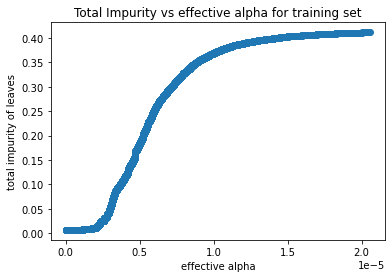

In [36]:
fig, ax = plt.subplots()
ax.plot(effective_alphas[:34600], impurities[:34600], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [37]:
index = np.where(effective_alphas == 1.882589870767738e-05)
print(index)
print('Impurity at best alpha:', impurities[index])

(array([34543]),)
Impurity at best alpha: [0.41048229]


In [38]:
full_effective_alphas = set(effective_alphas)

In [39]:
len(full_effective_alphas)

12662

In [40]:
full_effective_alphas = list(full_effective_alphas)

In [41]:
sort_effective_alpha = sorted(full_effective_alphas)
print(sort_effective_alpha)

[0.0, 2.3247920473513677e-07, 2.3247920473513846e-07, 2.905990059189197e-07, 3.32113149621623e-07, 3.4871880710270346e-07, 3.874653412252257e-07, 3.985357795459508e-07, 4.1514143702702874e-07, 4.6495840947027227e-07, 4.768804199695121e-07, 5.230782106540582e-07, 5.396838681351403e-07, 5.811980118378411e-07, 5.811980118378419e-07, 6.642262992432485e-07, 6.974376142054089e-07, 6.974376142054095e-07, 6.974376142054129e-07, 7.05740442945951e-07, 7.426419040150182e-07, 7.472545866486526e-07, 7.472545866486543e-07, 7.608410336786306e-07, 7.749306824504548e-07, 7.749306824504551e-07, 7.953235951465223e-07, 8.136772165729795e-07, 8.302828740540592e-07, 8.717970177567616e-07, 8.96705503978387e-07, 9.040857961921973e-07, 9.133111614594649e-07, 9.299168189405445e-07, 9.299168189405454e-07, 9.299168189405466e-07, 9.299168189405467e-07, 9.299168189405488e-07, 9.510512920982858e-07, 9.686633530630685e-07, 9.686633530630687e-07, 9.835658661871147e-07, 9.846178082899928e-07, 9.963394488648707e-07, 9.9

In [42]:
X_nt_under.shape

(286764, 30)

### 1. Crude grid search to save time

In [43]:
from sklearn.model_selection import GridSearchCV

dt = DecisionTreeClassifier(random_state=0)

effective_alphas = [0, 0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01 ]

dt_params = {'ccp_alpha': effective_alphas}

dt_grid = GridSearchCV(dt, dt_params, cv = 5, verbose=10)
dt_grid.fit(X_nt_under, y_nt_under)
dt_grid.best_params_

Fitting 5 folds for each of 7 candidates, totalling 35 fits
[CV 1/5; 1/7] START ccp_alpha=0.................................................
[CV 1/5; 1/7] END ...............................ccp_alpha=0; total time=   3.0s
[CV 2/5; 1/7] START ccp_alpha=0.................................................
[CV 2/5; 1/7] END ...............................ccp_alpha=0; total time=   2.9s
[CV 3/5; 1/7] START ccp_alpha=0.................................................
[CV 3/5; 1/7] END ...............................ccp_alpha=0; total time=   2.9s
[CV 4/5; 1/7] START ccp_alpha=0.................................................
[CV 4/5; 1/7] END ...............................ccp_alpha=0; total time=   3.0s
[CV 5/5; 1/7] START ccp_alpha=0.................................................
[CV 5/5; 1/7] END ...............................ccp_alpha=0; total time=   2.9s
[CV 1/5; 2/7] START ccp_alpha=1e-07.............................................
[CV 1/5; 2/7] END ...........................ccp_

{'ccp_alpha': 1e-05}

In [44]:
print(tree.export_text(dt_grid.best_estimator_))

|--- feature_4 <= 3.25
|   |--- feature_2 <= 25.27
|   |   |--- feature_3 <= 11.00
|   |   |   |--- feature_18 <= 0.50
|   |   |   |   |--- feature_2 <= 22.49
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_2 >  22.49
|   |   |   |   |   |--- feature_3 <= 0.62
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_3 >  0.62
|   |   |   |   |   |   |--- feature_29 <= 0.50
|   |   |   |   |   |   |   |--- feature_1 <= 17.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- feature_1 >  17.50
|   |   |   |   |   |   |   |   |--- feature_22 <= 0.50
|   |   |   |   |   |   |   |   |   |--- feature_2 <= 23.77
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |--- feature_2 >  23.77
|   |   |   |   |   |   |   |   |   |   |--- feature_2 <= 23.98
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |   |--- feature_2 >  23.98
|   |   |   |   |   |   |   |

In [45]:
y_pred = dt_grid.predict(X_nt_test)

In [46]:
conf_matrix = confusion_matrix(y_nt_test, y_pred)
print(conf_matrix)

[[186480 107621]
 [ 18453  42908]]


In [47]:
print('Precision score:',precision_score(y_nt_test, y_pred))
print('Recall score:', recall_score(y_nt_test, y_pred))
print('Accuracy score:', accuracy_score(y_nt_test, y_pred))
print('F1 score:', f1_score(y_nt_test, y_pred))

Precision score: 0.28504806382823245
Recall score: 0.6992715242580793
Accuracy score: 0.6453235507592935
F1 score: 0.4050025956864411


### 2. Refined tuning to narrow down the range

In [48]:
from sklearn.model_selection import GridSearchCV

dt = DecisionTreeClassifier(random_state=0)

effective_alphas = [0.000005, 0.00001, 0.00005 ]

dt_params = {'ccp_alpha': effective_alphas}

dt_grid = GridSearchCV(dt, dt_params, cv = 5, verbose=10)
dt_grid.fit(X_nt_under, y_nt_under)
dt_grid.best_params_

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5; 1/3] START ccp_alpha=5e-06.............................................
[CV 1/5; 1/3] END ...........................ccp_alpha=5e-06; total time=  12.1s
[CV 2/5; 1/3] START ccp_alpha=5e-06.............................................
[CV 2/5; 1/3] END ...........................ccp_alpha=5e-06; total time=  12.1s
[CV 3/5; 1/3] START ccp_alpha=5e-06.............................................
[CV 3/5; 1/3] END ...........................ccp_alpha=5e-06; total time=  12.0s
[CV 4/5; 1/3] START ccp_alpha=5e-06.............................................
[CV 4/5; 1/3] END ...........................ccp_alpha=5e-06; total time=  12.0s
[CV 5/5; 1/3] START ccp_alpha=5e-06.............................................
[CV 5/5; 1/3] END ...........................ccp_alpha=5e-06; total time=  11.1s
[CV 1/5; 2/3] START ccp_alpha=1e-05.............................................
[CV 1/5; 2/3] END ...........................ccp_

{'ccp_alpha': 5e-05}

In [49]:
from sklearn.model_selection import GridSearchCV

dt = DecisionTreeClassifier(random_state=0)

effective_alphas = [0.000025, 0.00005, 0.000075]

dt_params = {'ccp_alpha': effective_alphas}

dt_grid = GridSearchCV(dt, dt_params, cv = 5, verbose=10)
dt_grid.fit(X_nt_under, y_nt_under)
dt_grid.best_params_

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV 1/5; 1/3] START ccp_alpha=2.5e-05...........................................
[CV 1/5; 1/3] END .........................ccp_alpha=2.5e-05; total time=  16.0s
[CV 2/5; 1/3] START ccp_alpha=2.5e-05...........................................
[CV 2/5; 1/3] END .........................ccp_alpha=2.5e-05; total time=  15.7s
[CV 3/5; 1/3] START ccp_alpha=2.5e-05...........................................
[CV 3/5; 1/3] END .........................ccp_alpha=2.5e-05; total time=  15.9s
[CV 4/5; 1/3] START ccp_alpha=2.5e-05...........................................
[CV 4/5; 1/3] END .........................ccp_alpha=2.5e-05; total time=  16.0s
[CV 5/5; 1/3] START ccp_alpha=2.5e-05...........................................
[CV 5/5; 1/3] END .........................ccp_alpha=2.5e-05; total time=  16.0s
[CV 1/5; 2/3] START ccp_alpha=5e-05.............................................
[CV 1/5; 2/3] END ...........................ccp_

{'ccp_alpha': 2.5e-05}

In [51]:
from sklearn.model_selection import GridSearchCV

dt = DecisionTreeClassifier(random_state=0)

effective_alphas = [0.000015, 0.00002, 0.000025, 0.00003, 0.000035]

dt_params = {'ccp_alpha': effective_alphas}

dt_grid = GridSearchCV(dt, dt_params, cv = 5, verbose=10)
dt_grid.fit(X_nt_under, y_nt_under)
dt_grid.best_params_

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5; 1/5] START ccp_alpha=1.5e-05...........................................
[CV 1/5; 1/5] END .........................ccp_alpha=1.5e-05; total time=  16.2s
[CV 2/5; 1/5] START ccp_alpha=1.5e-05...........................................
[CV 2/5; 1/5] END .........................ccp_alpha=1.5e-05; total time=  16.7s
[CV 3/5; 1/5] START ccp_alpha=1.5e-05...........................................
[CV 3/5; 1/5] END .........................ccp_alpha=1.5e-05; total time=  18.1s
[CV 4/5; 1/5] START ccp_alpha=1.5e-05...........................................
[CV 4/5; 1/5] END .........................ccp_alpha=1.5e-05; total time=  16.2s
[CV 5/5; 1/5] START ccp_alpha=1.5e-05...........................................
[CV 5/5; 1/5] END .........................ccp_alpha=1.5e-05; total time=  16.5s
[CV 1/5; 2/5] START ccp_alpha=2e-05.............................................
[CV 1/5; 2/5] END ...........................ccp_

{'ccp_alpha': 2e-05}

In [52]:
from sklearn.model_selection import GridSearchCV

dt = DecisionTreeClassifier(random_state=0)

effective_alphas = [0.000017,0.000018, 0.000019, 0.00002,0.000021, 0.000022]

dt_params = {'ccp_alpha': effective_alphas}

dt_grid = GridSearchCV(dt, dt_params, cv = 5, verbose=10)
dt_grid.fit(X_nt_under, y_nt_under)
dt_grid.best_params_

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5; 1/6] START ccp_alpha=1.7e-05...........................................
[CV 1/5; 1/6] END .........................ccp_alpha=1.7e-05; total time=  16.2s
[CV 2/5; 1/6] START ccp_alpha=1.7e-05...........................................
[CV 2/5; 1/6] END .........................ccp_alpha=1.7e-05; total time=  15.6s
[CV 3/5; 1/6] START ccp_alpha=1.7e-05...........................................
[CV 3/5; 1/6] END .........................ccp_alpha=1.7e-05; total time=  16.3s
[CV 4/5; 1/6] START ccp_alpha=1.7e-05...........................................
[CV 4/5; 1/6] END .........................ccp_alpha=1.7e-05; total time=  16.3s
[CV 5/5; 1/6] START ccp_alpha=1.7e-05...........................................
[CV 5/5; 1/6] END .........................ccp_alpha=1.7e-05; total time=  16.4s
[CV 1/5; 2/6] START ccp_alpha=1.8e-05...........................................
[CV 1/5; 2/6] END .........................ccp_al

{'ccp_alpha': 1.9e-05}

### 3. Tuning on actual alphas based on the narrowed range

In [53]:
alphas_range = [alpha for alpha in full_effective_alphas if (alpha > 0.0000185 and alpha < 0.0000195)]

In [56]:
print(sorted(alphas_range))

[1.851226783022679e-05, 1.8516091962110016e-05, 1.8525601499224265e-05, 1.855584711576959e-05, 1.8557131100972735e-05, 1.859896960413391e-05, 1.861321880768541e-05, 1.862634997594297e-05, 1.87194164572888e-05, 1.8756042663565126e-05, 1.875936004051967e-05, 1.8766139854651964e-05, 1.876804630864082e-05, 1.878924999403715e-05, 1.8798387470082378e-05, 1.8801967859776413e-05, 1.8810421205973493e-05, 1.8817425237194598e-05, 1.882589870767738e-05, 1.883639265083041e-05, 1.8906345601364758e-05, 1.8961007832825815e-05, 1.8984186607772305e-05, 1.901948891356865e-05, 1.9034358757683738e-05, 1.9050718444747706e-05, 1.905263989720538e-05, 1.915986615736321e-05, 1.9212484316119983e-05, 1.9220497823035367e-05, 1.9234595254928125e-05, 1.923936741330827e-05, 1.9244392409473263e-05, 1.92487239727983e-05, 1.927792570200859e-05, 1.931604172069858e-05, 1.9318377109135172e-05, 1.9367411374169924e-05, 1.940147143919286e-05, 1.944882069538766e-05, 1.949834396156166e-05]


In [57]:
from sklearn.model_selection import GridSearchCV

dt = DecisionTreeClassifier(random_state=0)

dt_params = {'ccp_alpha': alphas_range}

dt_grid = GridSearchCV(dt, dt_params, cv = 5, verbose=10)
dt_grid.fit(X_nt_under, y_nt_under)
print(dt_grid.best_params_)

Fitting 5 folds for each of 41 candidates, totalling 205 fits
[CV 1/5; 1/41] START ccp_alpha=1.927792570200859e-05............................
[CV 1/5; 1/41] END ..........ccp_alpha=1.927792570200859e-05; total time=  16.5s
[CV 2/5; 1/41] START ccp_alpha=1.927792570200859e-05............................
[CV 2/5; 1/41] END ..........ccp_alpha=1.927792570200859e-05; total time=  16.0s
[CV 3/5; 1/41] START ccp_alpha=1.927792570200859e-05............................
[CV 3/5; 1/41] END ..........ccp_alpha=1.927792570200859e-05; total time=  17.1s
[CV 4/5; 1/41] START ccp_alpha=1.927792570200859e-05............................
[CV 4/5; 1/41] END ..........ccp_alpha=1.927792570200859e-05; total time=  16.7s
[CV 5/5; 1/41] START ccp_alpha=1.927792570200859e-05............................
[CV 5/5; 1/41] END ..........ccp_alpha=1.927792570200859e-05; total time=  16.1s
[CV 1/5; 2/41] START ccp_alpha=1.9034358757683738e-05...........................
[CV 1/5; 2/41] END .........ccp_alpha=1.9034358

[CV 1/5; 11/41] END ........ccp_alpha=1.9220497823035367e-05; total time=  15.6s
[CV 2/5; 11/41] START ccp_alpha=1.9220497823035367e-05..........................
[CV 2/5; 11/41] END ........ccp_alpha=1.9220497823035367e-05; total time=  15.5s
[CV 3/5; 11/41] START ccp_alpha=1.9220497823035367e-05..........................
[CV 3/5; 11/41] END ........ccp_alpha=1.9220497823035367e-05; total time=  15.6s
[CV 4/5; 11/41] START ccp_alpha=1.9220497823035367e-05..........................
[CV 4/5; 11/41] END ........ccp_alpha=1.9220497823035367e-05; total time=  15.8s
[CV 5/5; 11/41] START ccp_alpha=1.9220497823035367e-05..........................
[CV 5/5; 11/41] END ........ccp_alpha=1.9220497823035367e-05; total time=  15.8s
[CV 1/5; 12/41] START ccp_alpha=1.9244392409473263e-05..........................
[CV 1/5; 12/41] END ........ccp_alpha=1.9244392409473263e-05; total time=  15.7s
[CV 2/5; 12/41] START ccp_alpha=1.9244392409473263e-05..........................
[CV 2/5; 12/41] END ........

[CV 2/5; 21/41] END ........ccp_alpha=1.8817425237194598e-05; total time=  20.7s
[CV 3/5; 21/41] START ccp_alpha=1.8817425237194598e-05..........................
[CV 3/5; 21/41] END ........ccp_alpha=1.8817425237194598e-05; total time=  20.6s
[CV 4/5; 21/41] START ccp_alpha=1.8817425237194598e-05..........................
[CV 4/5; 21/41] END ........ccp_alpha=1.8817425237194598e-05; total time=  21.3s
[CV 5/5; 21/41] START ccp_alpha=1.8817425237194598e-05..........................
[CV 5/5; 21/41] END ........ccp_alpha=1.8817425237194598e-05; total time=  20.7s
[CV 1/5; 22/41] START ccp_alpha=1.861321880768541e-05...........................
[CV 1/5; 22/41] END .........ccp_alpha=1.861321880768541e-05; total time=  20.8s
[CV 2/5; 22/41] START ccp_alpha=1.861321880768541e-05...........................
[CV 2/5; 22/41] END .........ccp_alpha=1.861321880768541e-05; total time=  20.8s
[CV 3/5; 22/41] START ccp_alpha=1.861321880768541e-05...........................
[CV 3/5; 22/41] END ........

[CV 3/5; 31/41] END ........ccp_alpha=1.9318377109135172e-05; total time=  55.8s
[CV 4/5; 31/41] START ccp_alpha=1.9318377109135172e-05..........................
[CV 4/5; 31/41] END ........ccp_alpha=1.9318377109135172e-05; total time=  55.9s
[CV 5/5; 31/41] START ccp_alpha=1.9318377109135172e-05..........................
[CV 5/5; 31/41] END ........ccp_alpha=1.9318377109135172e-05; total time=  58.2s
[CV 1/5; 32/41] START ccp_alpha=1.901948891356865e-05...........................
[CV 1/5; 32/41] END .........ccp_alpha=1.901948891356865e-05; total time=  55.6s
[CV 2/5; 32/41] START ccp_alpha=1.901948891356865e-05...........................
[CV 2/5; 32/41] END .........ccp_alpha=1.901948891356865e-05; total time=  54.8s
[CV 3/5; 32/41] START ccp_alpha=1.901948891356865e-05...........................
[CV 3/5; 32/41] END .........ccp_alpha=1.901948891356865e-05; total time=  55.8s
[CV 4/5; 32/41] START ccp_alpha=1.901948891356865e-05...........................
[CV 4/5; 32/41] END ........

[CV 4/5; 41/41] END ..........ccp_alpha=1.92487239727983e-05; total time=  56.9s
[CV 5/5; 41/41] START ccp_alpha=1.92487239727983e-05............................
[CV 5/5; 41/41] END ..........ccp_alpha=1.92487239727983e-05; total time=  56.8s
{'ccp_alpha': 1.882589870767738e-05}


### 4. Best decision tree model after tuning

In [40]:
# Run all below to get best tree

In [41]:
from sklearn.tree import DecisionTreeClassifier #1.882589870767738e-05
#best_alpha = dt_grid.best_params_['ccp_alpha
best_alpha = 1.882589870767738e-05
dt_best = DecisionTreeClassifier(ccp_alpha = best_alpha, random_state=0)
dt_best.fit(X_nt_under, y_nt_under)

DecisionTreeClassifier(ccp_alpha=1.882589870767738e-05, random_state=0)

In [42]:
y_pred = dt_best.predict(X_nt_test)

In [43]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_nt_test, y_pred)
print(conf_matrix)

[[181794 112307]
 [ 17161  44200]]


In [44]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
print('Precision score:',precision_score(y_nt_test, y_pred))
print('Recall score:', recall_score(y_nt_test, y_pred))
print('Accuracy score:', accuracy_score(y_nt_test, y_pred))
print('F1 score:', f1_score(y_nt_test, y_pred))

Precision score: 0.2824154830135393
Recall score: 0.7203272436889882
Accuracy score: 0.6357754134056524
F1 score: 0.40575027080617615


In [45]:
import matplotlib.pyplot as plt
from sklearn import metrics

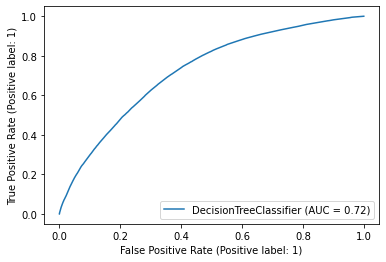

In [46]:
metrics.plot_roc_curve(dt_best, X_nt_test, y_nt_test) 

In [47]:
from sklearn import tree
print(tree.export_text(dt_best))

|--- feature_4 <= 3.25
|   |--- feature_2 <= 25.27
|   |   |--- feature_3 <= 11.00
|   |   |   |--- feature_18 <= 0.50
|   |   |   |   |--- feature_2 <= 22.49
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_2 >  22.49
|   |   |   |   |   |--- class: 1
|   |   |   |--- feature_18 >  0.50
|   |   |   |   |--- class: 1
|   |   |--- feature_3 >  11.00
|   |   |   |--- class: 1
|   |--- feature_2 >  25.27
|   |   |--- feature_2 <= 29.62
|   |   |   |--- feature_2 <= 28.88
|   |   |   |   |--- feature_2 <= 27.70
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- feature_2 >  27.70
|   |   |   |   |   |--- feature_9 <= 0.50
|   |   |   |   |   |   |--- feature_3 <= 7.50
|   |   |   |   |   |   |   |--- feature_1 <= 94.50
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- feature_1 >  94.50
|   |   |   |   |   |   |   |   |--- feature_0 <= 55.50
|   |   |   |   |   |   |   |   |   |--- feature_1 <= 99.50
|   |   |   |   |   |   |   |   |   |   |--

Feature: 0, Score: 0.11258
Feature: 1, Score: 0.07718
Feature: 2, Score: 0.24336
Feature: 3, Score: 0.00911
Feature: 4, Score: 0.41383
Feature: 5, Score: 0.00024
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.00869
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.02348
Feature: 10, Score: 0.00000
Feature: 11, Score: 0.00034
Feature: 12, Score: 0.00000
Feature: 13, Score: 0.01060
Feature: 14, Score: 0.00000
Feature: 15, Score: 0.00000
Feature: 16, Score: 0.01024
Feature: 17, Score: 0.00000
Feature: 18, Score: 0.01962
Feature: 19, Score: 0.00197
Feature: 20, Score: 0.00095
Feature: 21, Score: 0.00039
Feature: 22, Score: 0.00031
Feature: 23, Score: 0.00000
Feature: 24, Score: 0.00000
Feature: 25, Score: 0.00000
Feature: 26, Score: 0.00000
Feature: 27, Score: 0.00921
Feature: 28, Score: 0.00643
Feature: 29, Score: 0.05147


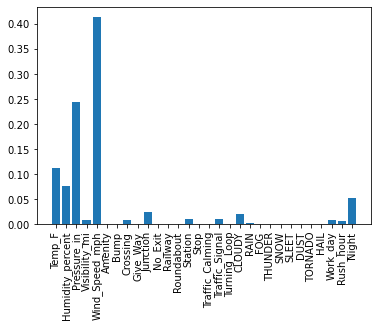

In [48]:
# decision tree for feature importance on a regression problem
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot

importance = dt_best.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance

pyplot.bar(X_no_trans, importance)
pyplot.xticks(rotation=90)

pyplot.show()

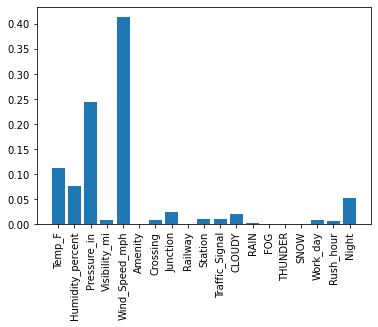

In [49]:
idx = dt_best.feature_importances_ > 0

x = np.array(X_no_trans)
#print(x[idx])
pyplot.bar(x[idx], dt_best.feature_importances_[idx])
pyplot.xticks(rotation=90)

pyplot.show()

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

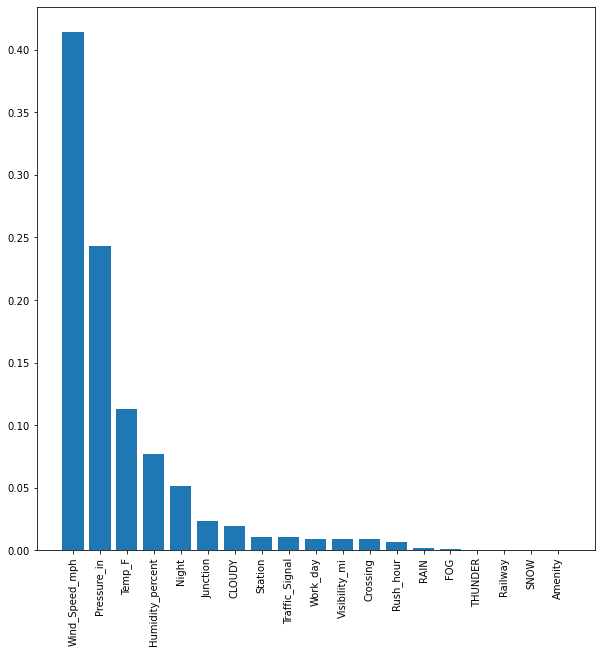

In [50]:
df_importance = pd.DataFrame()
df_importance['Attribute']=x[idx]
df_importance['Importance'] = dt_best.feature_importances_[idx]
#df_importance.head()
x_val = df_importance.sort_values(by=['Importance'], ascending=[False])['Attribute']
y_val = df_importance.sort_values(by=['Importance'], ascending=[False])['Importance']
idx = np.array(y_val) != 0

x = np.array(x_val)[idx]
y = y_val[idx]

plt.figure(figsize = (10,10))
plt.bar(x,y)
pyplot.xticks(rotation=90)

In [51]:
stop

NameError: name 'stop' is not defined

In [ ]:
import pydotplus
import graphviz
from sklearn import tree

tree.export_graphviz(dt_best, out_file='tree_num_refine.dot',
                     feature_names = X_no_trans, # specify variable names 
                     class_names = ['0','1'],
                     filled=True, rounded=True,
                     special_characters=True)
#graph = pydotplus.graph_from_dot_data(dot_data)

In [ ]:
from os import system
system("dot -Tpng tree_num_refine.dot -o tree_num_refine.png")